In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/konkuk-kuggle/1st_seminar/main/1st_seminar_data.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [43]:
# 데이터 프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [55]:
# 데이터 결측치 확인
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 1. race_ethnicity의 분포 확인

In [56]:
# 코드 작성
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

### 2. 데이터 컬럼명 바꾸기
- math_score -> math
- reading_score -> reading
- writing_score -> writing
- rename() 사용

In [57]:
# 코드 작성
df.rename(columns={'math_score':'math'}, inplace=True)
df.rename(columns={'reading_score':'reading'}, inplace=True)
df.rename(columns={'writing_score':'writing'}, inplace=True)

In [58]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 3. parental_level_of_education 칼럼 삭제하기
- drop() 사용
- axis=0 : 행 방향, axis=1 : 열 방향

In [59]:
# 코드 작성
df.drop(['parental_level_of_education'], axis=1, inplace=True)

In [60]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95
996,male,group C,free/reduced,none,62,55,55
997,female,group C,free/reduced,completed,59,71,65
998,female,group D,standard,completed,68,78,77


### 4-1. test_preparation_course의 none -> 0, completed -> 1로 바꾸기
- str.replace() 사용
- str.replace('a','b') : 'a' 값을 'b' 값으로 대체

In [61]:
# 코드 작성
df['test_preparation_course'] = df['test_preparation_course'].str.replace('none', '0').str.replace('completed', '1')
#str.replace함수는 replace함수와 다르게 찾으려는 문자열 일부만 가지고있더라도 변경 가능


In [62]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,standard,0,72,72,74
1,female,group C,standard,1,69,90,88
2,female,group B,standard,0,90,95,93
3,male,group A,free/reduced,0,47,57,44
4,male,group C,standard,0,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,1,88,99,95
996,male,group C,free/reduced,0,62,55,55
997,female,group C,free/reduced,1,59,71,65
998,female,group D,standard,1,68,78,77


### 4-2. lunch의 free/reduced -> 0, standard -> 1로 바꾸기

In [63]:
# 코드 작성
df['lunch'] = df['lunch'].replace('free/reduced', '0').replace('standard', '1')


In [53]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,1,0,72,72,74
1,female,group C,1,1,69,90,88
2,female,group B,1,0,90,95,93
3,male,group A,0,0,47,57,44
4,male,group C,1,0,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,1,1,88,99,95
996,male,group C,0,0,62,55,55
997,female,group C,0,1,59,71,65
998,female,group D,1,1,68,78,77


### 5. math의 결측치를 평균값으로 대체하기

In [64]:
# 임의로 결측치 만들기
math_indices = np.random.randint(0, 1000, size=10)
# 코드 작성
df.loc[math_indices, 'math'] = np.nan

df.isna().sum()

gender                      0
race_ethnicity              0
lunch                       0
test_preparation_course     0
math                       10
reading                     0
writing                     0
dtype: int64

In [65]:
# 평균값으로 대체하기

# 코드 작성
df['math']=df['math'].fillna(df.math.mean())

In [66]:
df.isna().sum()

gender                     0
race_ethnicity             0
lunch                      0
test_preparation_course    0
math                       0
reading                    0
writing                    0
dtype: int64

### 6. 성별에 따른 reading 평균값 계산하기

In [69]:
# 코드 작성
df.groupby('gender')['reading'].mean()

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

### 7. test_preparation_course별 writing 점수 분포 그래프 그리기

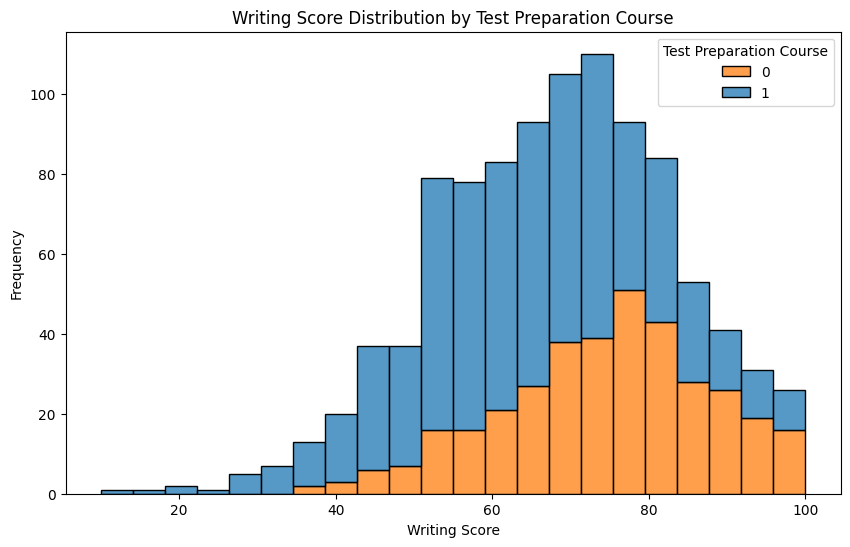

In [79]:
plt.figure(figsize=(10, 6)) #그림(figure) 생성 및 해당 그림 크기 지정
sns.histplot(data=df, x='writing', hue='test_preparation_course', multiple='stack')# 코드 작성, multiple='stack') #multiple='stack' - histogram을 쌓아서 그리라는 의미
plt.title('Writing Score Distribution by Test Preparation Course')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.legend(title='Test Preparation Course', labels=['0', '1']) #범례 추가
plt.show()

### 8-1. math_score, reading_score 관계 산점도로 나타내기 

In [80]:
# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/konkuk-kuggle/1st_seminar/main/1st_seminar_data.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


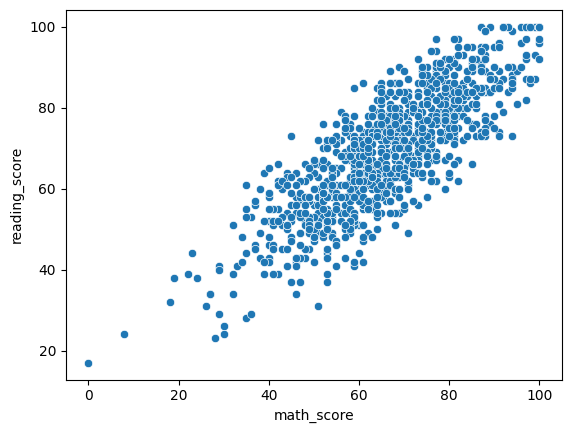

In [84]:
# 코드 작성
sns.scatterplot(data=df, x='math_score', y='reading_score')
plt.show()


### 8-2. 위에서 확인한 데이터 구조와 형태 등을 참고하여 8-(1)의 그래프 해석해보기

###<힌트>

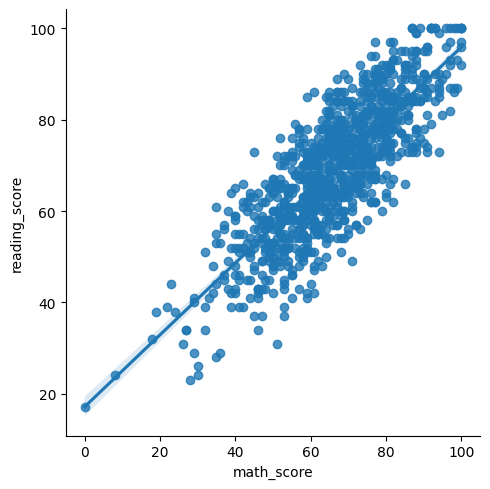

In [85]:
# sns.scatterplot에 회귀선 추가
sns.lmplot(data=df, x='math_score', y='reading_score')
plt.show()

In [87]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 46.2/46.2 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
from scipy import stats

# math_score와 reading_score 간의 피어슨 상관계수 계산
correlation, p_value = stats.pearsonr(df['math_score'], df['reading_score'])

# 상관계수 출력
print("피어슨 상관계수:", correlation)

피어슨 상관계수: 0.8175796636720544


답 : Pearson 상관 계수는 두 변수간의 선형 상관관계를 계량화한 수치입니다. Pearson 상관 계수는 +1과 -1 사이의 값을 가지며, +1은 완벽한 양의 선형 상관 관계, 0은 선형 상관 관계없음, -1은 완벽한 음의 선형 상관 관계를 의미합니다. 따라서 math_score과 reading_score은 강한 양의 선형 상관 관계를 가집니다.

### 9. 현재 많은 데이터분석과 인공지능 분야에서 널리 사용되는 딥러닝 기법의 장점과 단점에 대해 서술해주세요. (각 2개 이상)

답 :
- 장점
1. 딥러닝은 이미지 처리, 음성 인식, 자연어 이해, 추천 시스템 등 다양한 응용 분야에 적용되어 있습니다.
2. 딥러닝은 데이터로부터 자동으로 유용한 특징을 학습하므로, 특징 공학에 소요되는 시간과 노력을 줄일 수 있습니다.
- 단점
1. 딥러닝 모델은 대규모의 레이블된 데이터셋이 필요합니다. 이는 데이터 수집 및 준비에 많은 비용과 시간이 소요될 수 있음을 의미합니다.
2. 딥러닝 모델의 학습 및 추론에는 많은 계산 리소스가 필요합니다. 특히 고성능의 GPU 또는 TPU가 필요할 수 있습니다.